# NAME-PAPU SWAIN

DOMAIN-RETAIL

PROJECT-Retail Analysis with Walmart Data

OBJECTIVE-One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("Walmart_Store_sales.csv")

In [3]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
data.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
data["Date"]=pd.to_datetime(data["Date"])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [9]:
data["Date_index"]=data["Date"]
data=data.set_index(data["Date_index"])

In [10]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date_index
Date_index,,,,,,,,,
2010-05-02,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05-02
2010-12-02,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12-02
2010-02-19,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19
2010-02-26,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26
2010-05-03,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010-05-03


Which store has maximum sales?

In [11]:
data.groupby(["Store"])["Weekly_Sales"].sum().sort_values(ascending=False)[:1]

Store
20    3.013978e+08
Name: Weekly_Sales, dtype: float64

In [12]:
pd.DataFrame(data.groupby(["Store"])["Weekly_Sales"].sum().sort_values(ascending=False))[:1]

,Weekly_Sales
Store,
20,3.013978e+08


<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

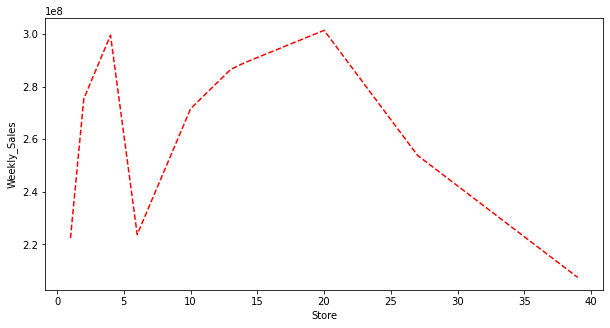

In [13]:
data1=data.groupby(["Store"])["Weekly_Sales"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.lineplot(data=data1,color="r",linestyle="--")

# store 20 has maximum sales.

Which store has maximum standard deviation?

In [14]:
pd.DataFrame(data.groupby(["Store"])["Weekly_Sales"].std().sort_values(ascending=False))[:1]

,Weekly_Sales
Store,
14,317569.949476


# store 14 has maximum standard deviation i.e., the sales vary a lot.

In [15]:
mean=data["Weekly_Sales"].mean()
mean

1046964.8775617732

In [16]:
std=data["Weekly_Sales"].std()
std

564366.6220536974

In [17]:
coefficient=mean/std
round(coefficient,3)

1.855

# Coefficient of mean to std is 1.855

Which store/s has good quarterly growth rate in Q3’2012?

In [18]:
data2=data.groupby(["Date","Store"])["Weekly_Sales"].agg(sum).reset_index()
data2.head()

,Date,Store,Weekly_Sales
0,2010-01-10,1,1453329.50
1,2010-01-10,2,1827440.43
2,2010-01-10,3,358784.10
3,2010-01-10,4,1842821.02
4,2010-01-10,5,283178.12


In [19]:
data2["Year"]=data2["Date"].dt.year
data2["Quarter"]=data2["Date"].dt.quarter
data2["Month"]=data2["Date"].dt.month
data2["Day"]=data2["Date"].dt.day

In [20]:
data2

,Date,Store,Weekly_Sales,Year,Quarter,Month,Day
0,2010-01-10,1,1453329.50,2010,1,1,10
1,2010-01-10,2,1827440.43,2010,1,1,10
2,2010-01-10,3,358784.10,2010,1,1,10
3,2010-01-10,4,1842821.02,2010,1,1,10
4,2010-01-10,5,283178.12,2010,1,1,10
...,...,...,...,...,...,...,...
6430,2012-12-10,41,1409544.97,2012,4,12,10
6431,2012-12-10,42,612379.90,2012,4,12,10
6432,2012-12-10,43,619369.72,2012,4,12,10
6433,2012-12-10,44,337796.13,2012,4,12,10


In [21]:
Q3_2012=data2[(data2["Quarter"]==3) & (data2["Year"]==2012)]

In [22]:
Q3_2012

,Date,Store,Weekly_Sales,Year,Quarter,Month,Day
5625,2012-07-09,1,1661767.33,2012,3,7,9
5626,2012-07-09,2,1898777.07,2012,3,7,9
5627,2012-07-09,3,408229.73,2012,3,7,9
5628,2012-07-09,4,2125104.72,2012,3,7,9
5629,2012-07-09,5,350648.91,2012,3,7,9
...,...,...,...,...,...,...,...
6160,2012-09-28,41,1307928.01,2012,3,9,28
6161,2012-09-28,42,505978.46,2012,3,9,28
6162,2012-09-28,43,577792.32,2012,3,9,28
6163,2012-09-28,44,355307.94,2012,3,9,28


In [59]:
pd.DataFrame(Q3_2012.groupby(["Store"])["Weekly_Sales"].sum().sort_values(ascending=False))[:3]

,Weekly_Sales
Store,
4,25652119.35
20,24665938.11
13,24319994.35


#  Stores 4,20 and 13 have good quarterly growth rate in Q3’2012.

Holiday Events

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [24]:
a1=data[data["Date"]=="12-02-2010"]["Weekly_Sales"].sum()
b1=data[data["Date"]=="11-02-2011"]["Weekly_Sales"].sum()
c1=data[data["Date"]=="10-02-2012"]['Weekly_Sales'].sum()
d1=data[data["Date"]=="08-02-2013"]['Weekly_Sales'].sum() 
super_bowl=a1+b1+c1+d1
super_bowl

145682278.34000003

In [25]:
a2=data[data["Date"]=="10-09-2010"]['Weekly_Sales'].sum()
b2=data[data["Date"]=="09-09-2011"]['Weekly_Sales'].sum()
c2=data[data["Date"]=="07-09-2012"]['Weekly_Sales'].sum()
d2=data[data["Date"]=="06-09-2013"]['Weekly_Sales'].sum() 
labour_day=a2+b2+c2+d2
labour_day

140727684.68

In [26]:
a3=data[data["Date"]=="26-11-2010"]['Weekly_Sales'].sum()
b3=data[data["Date"]=="25-11-2011"]['Weekly_Sales'].sum()
c3=data[data["Date"]=="23-11-2012"]['Weekly_Sales'].sum()
d3=data[data["Date"]=="29-11-2013"]['Weekly_Sales'].sum() 
thanks_giving=a3+b3+c3+d3
thanks_giving

132414608.5

In [27]:
a4=data[data["Date"]=="31-12-2010"]['Weekly_Sales'].sum()
b4=data[data["Date"]=="30-12-2011"]['Weekly_Sales'].sum()
c4=data[data["Date"]=="28-12-2012"]['Weekly_Sales'].sum()
d4=data[data["Date"]=="27-12-2013"]['Weekly_Sales'].sum() 
christmas=a4+b4+c4+d4
christmas

86474980.04

<AxesSubplot:>

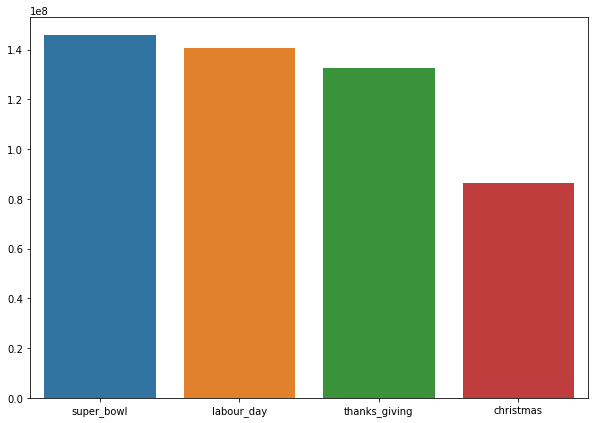

In [28]:
plt.figure(figsize=(10,7))
sns.barplot(x=list(["super_bowl","labour_day","thanks_giving","christmas"])
            ,y=list([super_bowl,labour_day,thanks_giving,christmas])
           )

# In Super bowl festival,the sales is high and in christmas,it is low.

Provide a monthly and semester view of sales in units and give insights

In [29]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date_index
Date_index,,,,,,,,,
2010-05-02,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05-02
2010-12-02,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12-02
2010-02-19,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19
2010-02-26,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26
2010-05-03,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010-05-03


In [30]:
data["Year"]=data["Date"].dt.year
data["Semester"]=(data["Date"].dt.month-1)//6
data["Quarter"]=data["Date"].dt.quarter
data["Month"]=data["Date"].dt.month

In [31]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date_index,Year,Semester,Quarter,Month
Date_index,,,,,,,,,,,,,
2010-05-02,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05-02,2010,0,2,5
2010-12-02,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12-02,2010,1,4,12
2010-02-19,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,2010,0,1,2
2010-02-26,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,2010,0,1,2
2010-05-03,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010-05-03,2010,0,2,5


In [32]:
data["Semester"].value_counts()

0    3240
1    3195
Name: Semester, dtype: int64

Yearly view of sales in unit

In [33]:
pd.DataFrame(data.groupby(["Year"])["Weekly_Sales"].agg(sum))

,Weekly_Sales
Year,
2010,2.288886e+09
2011,2.448200e+09
2012,2.000133e+09


Semester view of sales in unit

In [34]:
pd.DataFrame(data.groupby(["Semester"])["Weekly_Sales"].agg(sum))

,Weekly_Sales
Semester,
0,3.327977e+09
1,3.409242e+09


Monthly view of sales in unit

In [35]:
pd.DataFrame(data.groupby(["Month"])["Weekly_Sales"].agg(sum))

,Weekly_Sales
Month,
1,4.264263e+08
2,5.220257e+08
3,5.534864e+08
4,6.453239e+08
5,6.056966e+08
6,5.750180e+08
7,5.933139e+08
8,5.642317e+08
9,5.905323e+08


For Store 1 – Build  prediction models to forecast demand

In [36]:
data_store1=data[data["Store"]==1]
data_store1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date_index,Year,Semester,Quarter,Month
Date_index,,,,,,,,,,,,,
2010-05-02,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010-05-02,2010,0,2,5
2010-12-02,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010-12-02,2010,1,4,12
2010-02-19,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010-02-19,2010,0,1,2
2010-02-26,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010-02-26,2010,0,1,2
2010-05-03,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010-05-03,2010,0,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,2012-09-28,2012,1,3,9
2012-05-10,1,2012-05-10,1670785.97,0,68.55,3.617,223.181477,6.573,2012-05-10,2012,0,2,5
2012-12-10,1,2012-12-10,1573072.81,0,62.99,3.601,223.381296,6.573,2012-12-10,2012,1,4,12


In [37]:
data_store1=data_store1.drop(columns=["Date","Date_index","Year","Semester","Quarter","Month"],axis=1)
data_store1

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date_index,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
2012-09-28,1,1437059.26,0,76.08,3.666,222.981658,6.908
2012-05-10,1,1670785.97,0,68.55,3.617,223.181477,6.573
2012-12-10,1,1573072.81,0,62.99,3.601,223.381296,6.573


In [38]:
x=data_store1.drop(columns=["Weekly_Sales"],axis=1)
y=data_store1["Weekly_Sales"]

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test=train_test_split(x,y,train_size=0.70,random_state=25)

In [40]:
x_train.shape

(100, 6)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [42]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [43]:
y_train_pred=model.predict(x_train)
y_train_pred

array([1471636.69286487, 1518034.74286925, 1734596.81107131,
       1578846.65451469, 1582110.34070684, 1486845.01919804,
       1613830.67161552, 1728076.41349178, 1532697.50621254,
       1475983.73969879, 1469962.84156643, 1642437.27730833,
       1646697.58348579, 1539717.57719319, 1557996.34865692,
       1522375.64011688, 1471639.01600054, 1587886.25485918,
       1602187.71966184, 1515204.26610863, 1464900.81409886,
       1548565.87577876, 1495787.6426348 , 1474236.11629783,
       1552889.64847633, 1741405.80745604, 1508775.6064927 ,
       1531420.76928711, 1515900.88886987, 1504700.76230922,
       1453270.62844704, 1468404.69081356, 1641441.22761588,
       1533010.82922664, 1547220.18329704, 1518557.79649247,
       1616726.48441836, 1451790.19377634, 1567817.29193025,
       1463111.24578713, 1559860.74175954, 1551035.24078906,
       1596337.32116049, 1514234.68723225, 1620475.68778683,
       1446191.13110305, 1465705.55823054, 1527715.11640268,
       1615673.04293637,

In [44]:
y_test_pred=model.predict(x_test)
y_test_pred

array([1625516.38640268, 1664247.29265922, 1465956.06588888,
       1513512.08965932, 1515179.00456702, 1462344.92098931,
       1810483.46590538, 1587125.07499827, 1593355.24469718,
       1576752.05314107, 1570440.75266356, 1573451.36025913,
       1495710.60152353, 1512123.62506055, 1461272.48506071,
       1525548.2251959 , 1534344.44384478, 1535569.62855775,
       1557287.37966943, 1719478.98887134, 1543326.59293686,
       1576538.85432819, 1655284.90034381, 1566530.20697397,
       1607812.75996748, 1465042.63042201, 1532990.71187724,
       1721270.59846662, 1502482.38747871, 1668765.25394195,
       1460620.50999408, 1543106.81544014, 1595366.49001142,
       1615465.40326547, 1500772.02724821, 1469844.08524033,
       1592286.223557  , 1578096.6109447 , 1479461.29014204,
       1460283.74693403, 1598647.85454236, 1605760.14753715,
       1578261.3103446 ])

In [45]:
from sklearn.metrics import mean_squared_error,r2_score

In [46]:
mean_squared_error(y_pred=y_train_pred,y_true=y_train)

22405193652.33057

In [47]:
mean_squared_error(y_pred=y_test_pred,y_true=y_test)

17866558742.5383

In [48]:
r2_score(y_pred=y_train_pred,y_true=y_train)

0.18009850399469085

In [49]:
r2_score(y_pred=y_test_pred,y_true=y_test)

-0.06910826627253108

In [50]:
error=y_test-y_test_pred
accurcy=round((y_test_pred-y_test)*100/y_test,2)
error_data=pd.DataFrame(np.array([y_test,y_test_pred,error,accurcy])).T
error_data=error_data.rename(columns={0:'Actual',1:'Predicted',2:'Error',3:'Accurcy%'})
error_data

,Actual,Predicted,Error,Accurcy%
0,1677472.78,1.625516e+06,51956.393597,-3.10
1,1539483.70,1.664247e+06,-124763.592659,8.10
2,1492418.14,1.465956e+06,26462.074111,-1.77
3,1453329.50,1.513512e+06,-60182.589659,4.14
4,1352219.79,1.515179e+06,-162959.214567,12.05
5,1513080.49,1.462345e+06,50735.569011,-3.35
6,1497462.72,1.810483e+06,-313020.745905,20.90
7,1521577.87,1.587125e+06,-65547.204998,4.31
8,1624477.58,1.593355e+06,31122.335303,-1.92
9,1472515.79,1.576752e+06,-104236.263141,7.08


Correlation among CPI,unemployment,Fuel price and Weekly_sales.

In [51]:
data3=data_store1[["Weekly_Sales","CPI","Fuel_Price","Unemployment"]].corr()
data3

,Weekly_Sales,CPI,Fuel_Price,Unemployment
Weekly_Sales,1.000000,0.225408,0.124592,-0.097955
CPI,0.225408,1.000000,0.755259,-0.813471
Fuel_Price,0.124592,0.755259,1.000000,-0.513944
Unemployment,-0.097955,-0.813471,-0.513944,1.000000


<AxesSubplot:>

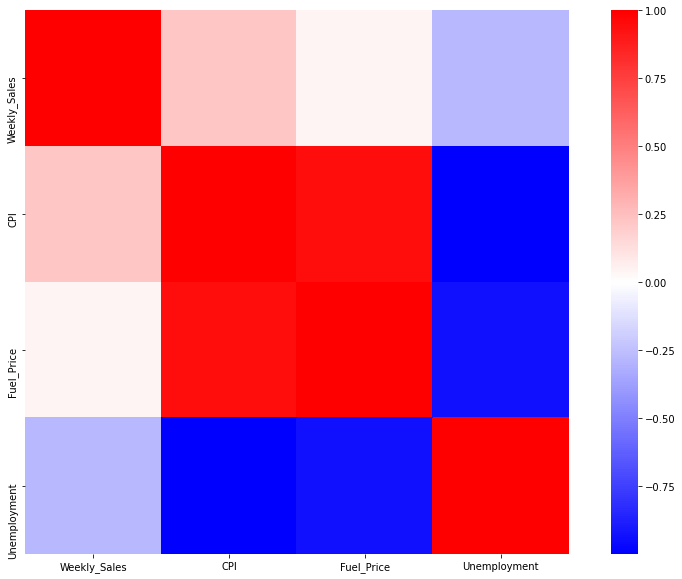

In [52]:
plt.figure(figsize=(15,10))
sns.heatmap(data3.corr(),cmap="bwr",square=True)

Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

In [53]:
import statsmodels.formula.api as smf

In [54]:
data4=smf.ols(formula="Weekly_Sales~CPI+Unemployment+Fuel_Price",data=data_store1).fit()
print(data4.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     4.303
Date:                Mon, 24 Jan 2022   Prob (F-statistic):            0.00616
Time:                        14:36:44   Log-Likelihood:                -1906.0
No. Observations:                 143   AIC:                             3820.
Df Residuals:                     139   BIC:                             3832.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -3.887e+06   1.74e+06     -2.234   

## CPI, unemployment, and fuel price have a low impact on sales i.e. 8.5%.

In [55]:
from sklearn.metrics import mean_squared_error,r2_score

In [56]:
y_pred=data4.predict()

In [57]:
 mean_squared_error(y_pred=y_pred,y_true=data_store1["Weekly_Sales"])

22106620866.561615

In [58]:
r2_score(y_pred=y_pred,y_true=data_store1["Weekly_Sales"])

0.0849855578999581

#              THANK YOU